<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Week 5 Day 2</div>
<div style="text-align: right">Dino Konstantopoulos, 5 February 2020, with material by Alan Spencer and Allen Downey</div>

In [Statistical hypothesis testing](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing), which is classical statistics for Data Science, you talk about [confidence intervals](https://en.wikipedia.org/wiki/Confidence_interval), the [null hypothesis](https://en.wikipedia.org/wiki/Null_hypothesis) (*nothing new happening*), [false positives and false negatives](https://en.wikipedia.org/wiki/False_positives_and_false_negatives), the [T-test](https://en.wikipedia.org/wiki/Student%27s_t-test), the [chi-squared test](https://en.wikipedia.org/wiki/Chi-squared_test), and [ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance), among other things.

What *are* all these data science concepts? Please take a look at the URLs.

**Statistical hypothesis testing**, also called [confirmatory data analysis](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing) is a framework for determining ***whether observed data deviates from what is expected***. 

A **hypothesis** is proposed for the statistical relationship between two data sets (or two data columns), and this is compared as an alternative to an idealized `null hypothesis` that proposes ***no relationship between them**. 

>**Hypothesis testing** is such a badly-taught subject in statistics that *few students clearly understand the theory behind it*, and just blindly call `SciPy` statistincal testing APIs. Bad preofessors! ***We*** have a secret weapon: we can *code* in python, run simulations, and *count*! Let's put our secret weapon to good use and learn *everything* about hypothesis testing.

# In a nutshell

If you wanted to test whether the statistics of a [placebo group](https://en.wikipedia.org/wiki/Clinical_trial#Placebo_groups) is different from the **drug group**, the **null hypothesis** states that ***there is no difference*** (nothing new).

The purpose of a **hypothesis test** is to determine whether the null hypothesis is ***likely to be true*** given sample data. If there is little evidence against the null hypothesis given the data, you **accept** the null hypothesis. If the null hypothesis is unlikely given the data, you might **reject** the null hypothesis in favor of the alternative hypothesis: ***that something interesting/strange is going on***.

Once you have the **null** and **alternative** hypothesis in hand, you choose a [significance level](https://en.wikipedia.org/wiki/Statistical_significance) (often denoted by the Greek letter $\alpha$). The significance level is a probability threshold that determines when you ***reject*** the null hypothesis. 

After carrying out a test, if the probability of getting a result as strange as the one you observe is lower than the significance level, you reject the null hypothesis in favor of the alternative. If the probability is higher than $\alpha$, then the null hypothesis is in effect and the result is ***not strange at all***. 

This probability of seeing a result as strange or more strange than the one observed is known as the [p-value](https://en.wikipedia.org/wiki/P-value). 

>The ***p-value**: If the **p-value** is *high*, *uncertainty* in the experiment is *high*, and it will be difficult to conclude one way or the other (i.e. there is no difference). If the **p-value** is *low*, there is *low* probability to see a *strange* result, and so if we do see a strange result it is conclusive that the drug and placebo groups follow different distributions and thus that the drug group *has an effect*.


# Classical hypothesis testing

How does science answer the following question:
- *Is the number of emails I receive every day really random*?

Or how about:
- *What's the probability that the cloud I observe in the sky today, which is shaped like a heart, is evidence that my girlfriend, who just broke up with me, really does love me*?

In the first case, it's not random. In the second case, it's just a random event, not a message from your girlfriend, sorry :-(

Our brain is a *prediction machine*, so we are constantly playing with probabilities in our head, and sometimes emotions lead us astray! Just read about all conspiracy theories on facebook!

This is really important, as several scientific discoveries have later turned out to be ***statistical anomalies*** (heart-shaped clouds), e.g. cold fusion, and (good) scientists are loath to declare discovery and later find out that the result was just a blip. In high energy physics, for example, it is likely that you will see a statistically improbable event at some particular energy level. The world of quantum physics is a very strange world!

Here's a concrete example: There is just under a half of a point-one percent chance of flipping an ordinary coin 100 times and getting at least 66 heads:

Recall that the probability of getting exactly k successes in n independent Bernoulli trials is given by: 

$$p(k,n,p) = (^n_k) p^k (1-p)^{n-k}$$

where

$$(^n_k) = \frac{n!}{k!\;(n-k)!}$$

Please write down two ways for obtaining this probability:

In [1]:
from math import factorial

def choose(n, k):
    """Number of ways to choose c items from a list of n items."""
    return factorial(n) // (factorial(n - k) * factorial(k))

choose(100,66) * 0.5**66 * 0.5**34

0.00045810527728724014

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from scipy.stats import binom
binom.pmf(66,100,0.5)

0.00045810527728724286

In [4]:
from collections import Counter

In [5]:
for _ in range(10):
    print(Counter(np.random.choice(range(3),100)))

Counter({0: 35, 1: 34, 2: 31})
Counter({0: 38, 2: 35, 1: 27})
Counter({2: 40, 1: 34, 0: 26})
Counter({1: 39, 2: 31, 0: 30})
Counter({0: 41, 1: 30, 2: 29})
Counter({2: 38, 0: 32, 1: 30})
Counter({1: 40, 2: 36, 0: 24})
Counter({0: 37, 2: 34, 1: 29})
Counter({2: 39, 0: 36, 1: 25})
Counter({1: 39, 2: 35, 0: 26})


In [6]:
events = []
for _ in range(10):
    event = Counter(np.random.choice(range(2),100))
    events.append(event)

events

[Counter({0: 49, 1: 51}),
 Counter({0: 45, 1: 55}),
 Counter({1: 54, 0: 46}),
 Counter({1: 52, 0: 48}),
 Counter({0: 51, 1: 49}),
 Counter({0: 45, 1: 55}),
 Counter({0: 45, 1: 55}),
 Counter({1: 53, 0: 47}),
 Counter({1: 51, 0: 49}),
 Counter({1: 54, 0: 46})]

In [7]:
events = []
for _ in range(10):
    event = Counter(np.random.choice(range(2),100))
    events.append(((event[0],event[1])))
Counter(events)

Counter({(41, 59): 1,
         (50, 50): 1,
         (49, 51): 1,
         (53, 47): 1,
         (46, 54): 1,
         (56, 44): 1,
         (48, 52): 1,
         (42, 58): 1,
         (44, 56): 1,
         (54, 46): 1})

0.00043


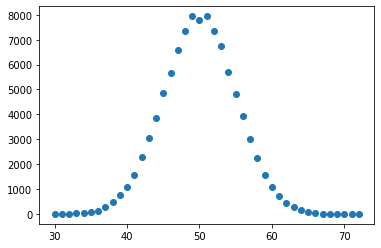

In [8]:
events = []
for _ in range(100000):
    event = Counter(np.random.choice(range(2),100))
    events.append(((event[0],event[1])))
x = []
y = []
result = 0
for k,v in Counter(events).items():
    x.append(k[0])
    y.append(v)
    if k[0] == 66: result = v

plt.scatter(x,y)
print(result/100000)   


But if a hundred thousand people flip identical coins 100 times each, it becomes likely (close to 50%!) that a few people will get at least 66 heads each! 

The **union** for 100,000 people of the probability above:

In [9]:
100000 * choose(100,66) * 0.5**66 * 0.5**34

45.81052772872401

So if one researcher gets proof, in a scientific experiment, that cold fusion works for example, does it mean it really does if there is a chance for cold fusion to spuriously manifest itself?

One of those events on its own should not be interpreted as evidence of cold fusion, or in the case we wil study in this notebook that a die is somehow rigged!

Probabilities are *tricky*! Rememeber: just because *somebody* won the lottery ***twice*** does not mean *you* have the same chance (same probability as *anyone* every winning it)! (or probability of sharing your birthday with somebody else in class versus probability of two students in class sharing a birthday).

>**FACT**: That is why it is so easy to be fooled into a religion based on documented *miracles*! Religion is not based on **proof**, it is based on **faith**.

The Greek letter $\sigma$ is used to represent **standard deviation**. 

Standard deviation measures the distribution of data points around a mean, or average, and can be thought of as how spread out the distribution of points or values is. 

A sample with a high standard deviation is more spread out—it has more variability, and a sample with a low standard deviation clusters more tightly around the mean. 

For example, a plot of dogs' heights would probably have a larger standard deviation than a plot of heights of dogs from a particular breed, even if that breed had the same average height as dogs in general.

In particle physics, the $\sigma$ used is the standard deviation arising from a normal distribution of data, familiar to us as the prettiest data in the world: a bell curve or gaussian. In a perfect bell curve, 68% of the data is within one standard deviation of the mean, 95% is within two, and so on.

>**The Higgs Boson**: Read about the discovery of the Higgs boson [here](https://www.aspenideas.org/sessions/the-god-particle?gclid=Cj0KCQiA7OnxBRCNARIsAIW53B-imTAWNDTWMItF9VlpVeEatZIB69TV_53SkQfheFafKbzqMToiOkUaAvPTEALw_wcB). Then, [here](https://understandinguncertainty.org/explaining-5-sigma-higgs-how-well-did-they-do) and [here](https://medium.com/@chris.m.pease/the-higgs-boson-and-5-sigma-eec238b43f93) to understand the role of data science in the discovery! If you're absolutely fascinated by physics, then read [this](https://wwwf.imperial.ac.uk/~dvandyk/Research/14-reviews-higgs.pdf) longer account.

Scientists use **p-values** to test the likelihood of hypotheses. In an experiment comparing some phenomenon A to phenomenon B, researchers construct two hypotheses: that *A and B are not correlated*, which is known as the **null hypothesis**, and that *A and B are correlated*, which is known as the **research hypothesis**.

The researchers then assume the null hypothesis (because it's the most conservative supposition, intellectually) and calculate the probability of obtaining data as *extreme* or *more extreme* than what they observed, given that there is no relationship between A and B. 

This calculation, which yields the p-value, can be based on any of several different statistical tests. 

If the p-value is low, for example 0.01, this means that there is only a small chance (one percent for p=0.01) that the data would have been observed by chance, so the null hypothesis is *unlikely*.

>If the p-value is ***low***, that means the probability of obtaining data *by chance* is ***low***

Usually there is a pre-established threshold ($\alpha$) in a field of study for rejecting the null hypothesis and claiming that A and B are correlated. Values of $\alpha=0.05$ and $\alpha=0.01$ are common in many scientific disciplines.

>In High-energy physics, the standard for p-values to announce evidence or discoveries is even lower, because there are ***so many spurious events***. The threshold for **evidence of a particle** corresponds to $\alpha=0.003$, and the standard for **discovery** is $\alpha=0.0000003$! That's ***seven*** decimal points!

> In High-energy physics, **five-sigma** corresponds to a p-value, or probability, of 3x10-7, or about 1 in 3.5 million. That is the standard that was used to announce the discovery of the Higgs boson. This is not the probability that the Higgs boson does or doesn't exist. Rather, it is the probability that if the particle does not exist (null hypothesis), the data that CERN scientists collected in Geneva, Switzerland, would be as extreme as what observed. *Sooooooo* low, that that the null hypothesis is probably invalid and the particle *does* exist.

p-values are everywhere in statistics (e.g. probability that a drug *works* and is not a placebo), so we *need* to learn it!

# Case study with simulated die

Somebody built us a simulated die. Let's see if it's **fair**, with a little bit of help from Data Science.

In [10]:
# for repeatability:
import numpy as np
np.random.seed(0)

from scipy.stats import poisson, uniform
sample_size = 1000
maxval = 6
mu = 2.5

cutoff = poisson.cdf(maxval, mu)
# generate uniform distribution [0,cutoff):
u = uniform.rvs(scale=cutoff, size= sample_size)
# convert to Poisson:
truncated_poisson = poisson.ppf(u, mu)
truncated_poisson = [int(x+1) for x in truncated_poisson]
allnums = ''.join(str(n) for n in truncated_poisson)
allnums

'344334356353461215557535242633253414446433414422334372224232224223525273744122323314423246342422415142462444263543535454436434134243234444435335542647252425543143457513423121523641244264344332264322133432114335724214334545252642642231233324523243422336445244632216452413753626654535413273343252322576653132214152124234542213234423251455234232315133464133342236253353436443442256345364565243132516331236265332411312222124773243715224243342433561235766372262414523342233523645644673132324356324534233233334365123234444234532141336231342224446144461453352334223454275363656612363253624314211164543373337234143223333622344373445754432123356224456733244523422513237352233434433415443233314244462513333213532122221152453223335461535474333323423221612415463336325312353335673654222633355235522313242427632231433546355342522234331312625524244536134322535433354146423236623462253523333336442455354253334435433532156232251725433434335454152513235323522143343452722233355242333341542637232346544635525132342362

In [11]:
len(allnums)

1000

In [12]:
Counter(allnums)

Counter({'3': 269, '4': 202, '5': 128, '6': 75, '1': 81, '2': 216, '7': 29})

Suppose you see this clearly non-**Uniform** (since it's **Poisson**!) histogram for the faces of your simulated die. 

Based on the `allnums` roll above, what is the frequency for each number? Write this down in the cell below in the form of a `pandas` dataframe:

In [13]:
import pandas as pd

Hmm.. what's that `7` doing there?? Let's get rid of it:

In [14]:
allnums = [6 if x == '7' else int(x) for x in allnums]
allnums = ''.join(str(n) for n in truncated_poisson)
allnums

'344334356353461215557535242633253414446433414422334372224232224223525273744122323314423246342422415142462444263543535454436434134243234444435335542647252425543143457513423121523641244264344332264322133432114335724214334545252642642231233324523243422336445244632216452413753626654535413273343252322576653132214152124234542213234423251455234232315133464133342236253353436443442256345364565243132516331236265332411312222124773243715224243342433561235766372262414523342233523645644673132324356324534233233334365123234444234532141336231342224446144461453352334223454275363656612363253624314211164543373337234143223333622344373445754432123356224456733244523422513237352233434433415443233314244462513333213532122221152453223335461535474333323423221612415463336325312353335673654222633355235522313242427632231433546355342522234331312625524244536134322535433354146423236623462253523333336442455354253334435433532156232251725433434335454152513235323522143343452722233355242333341542637232346544635525132342362

In [15]:
Counter(allnums)

Counter({'3': 269, '4': 202, '5': 128, '6': 75, '1': 81, '2': 216, '7': 29})

In [16]:
digits = pd.Series(Counter(list(allnums)))
digits

3    269
4    202
5    128
6     75
1     81
2    216
7     29
dtype: int64

Better!

Let's plot the histogram.

(array([ 81., 216.,   0., 269.,   0., 202., 128.,   0.,  75.,  29.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

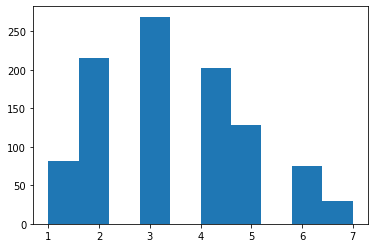

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist([int(x) for x in list(allnums)])

In [18]:
digits_df = pd.DataFrame.from_dict(digits)
digits_df

,0
3,269
4,202
5,128
6,75
1,81
2,216
7,29


What probability density profile might you match this distribution with?

Answer: **Poisson**, obviously from observation (long tail) and knowing we're dealing with integer numbers! But also because we know *how we simulated the data*. Duh!

Let's assume we do not know *how* we simulated the data, but just by looking at the histogram:

In [19]:
plt.hist(observed_faces, alpha=0.5)

NameError: name 'observed_faces' is not defined

We *suspect* it's a Poisson distribution because we know what Poisson looks like! So we apply **MOM** or **MLE**:

For the Poisson distribution, its **expectation** (or first moment) as well as its **standard deviation** (or second moment) are equal to its *sole* parameter, i.e.:

$$E(X) = \text{Var}(X) = \lambda$$

Let's get the *empirical* (from data) first moment:

In [ ]:
observed_faces_mean = pd.Series(observed_faces).mean()
observed_faces_mean

Let's match it to the first moment for the Poisson distribution (**MO**) and plot both theoiretical and empirical histograms on top of one another:

In [ ]:
lambda_mom = observed_faces_mean

In [ ]:
from scipy.stats.distributions import poisson

#pd.Series(observed_faces).hist(normed=True, bins=20)
mu = 3.392
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
plt.plot(x, poisson.pmf(x, mu))

In [ ]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

mu = 3.392
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
#x = np.arange(1, 7)
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

pd.Series(observed_faces).hist(normed=True, bins=20)

Good match (minus a scaling factor)! So, an experienced data scientist *like you after last class* would say **nope, that is definitely not a Uniform distribution**, so that die *cannot be fair*!

But what if you did not know of Poission. Or what if the problem is much more complicated than this?

What is the probability of seeing results like the below ***by chance***?

|Faces|Frequencies|
|-|-|
|3 | 269|
|4 | 202|
|5 |128|
|6 |104|
|1 | 81|
|2 | 216|

The null hypothesis is that the die is fair. Under that assumption, the expected frequency for
each value is 166, so the frequencies 4, 5 and 6 may not be as surprising to you, but 2 is a little funny and
1 and 3 are definitely suspicious!

Let's just assume we do not know how the data was generated and ask ourselves: What is the probability of seeing results like this by ***chance***?

## Hypothesis testing: Is the apparent effect real, or is it due to chance?  

To answer that question, we formulate two hypotheses: the **null hypothesis H0** is a model of the die if the histogram above is due to ***chance***. The **alternate hypothesis HA** is a model of a **crooked** (unfair) die.

>**NOTE**: Ideally we should compute the probability of seeing a non-uniform histogram effect $E$ under ***both*** hypotheses; that is $P(E \;|\; H0)$ and $P(E \;|\; \text{HA})$.  But formulating $\text{HA}$ is not always easy, so in conventional hypothesis testing, we just compute $P(E \;|\; H0)$, which is the **p-value**.  

If the p-value is ***small***, we conclude that the non-uniform histogram is unlikely to have occurred by chance, which suggests that the die is **crooked**.

#### Step 1: Build the null hypothesis
The first step is to get data from our observations and compute a test statistic.  The result is some measure of the size of the effect, or **delta**.  For example, if we were comparing the mean of two groups, delta is the **difference in the means**.  Since we are comparing actual values with expected values, delta is a **chi-squared** statistic: a measure of the distance between the observed and expected values.

#### Step 2: Build a model
The next step is to build a model and generate simulated data for the null hypothesis. Then we'll apply the test statistic to the simulated data.

#### Step 3: How many times does the test statistic for the simulated data exceed the delta?
The last step is the easiest: Count how many times the test statistic for the simulated data exceeds delta. That's your **p-value**!

So, to compute a p-value, we have to choose a test statistic that measures how unexpected the histogram above is.  The **chi-squared** statistic is a reasonable choice: for each digit we compare the expected frequency and the observed frequency and compute the sum of the squared relative differences.

We have 6 faces in our 1,000 roll sequence, thus we expect the following frequency for each face:

and the following probability:

The first step is to get data from our observations and compute a test statistic. The result is some
measure of the size of the effect, which we call **delta**. 

- If you are comparing the mean of two groups, delta is the difference in the means. 

- If you are comparing actual values with expected values, delta is a chi-squared statistic 
or some other measure of the distance between the observed and expected values.

The **null hypothesis** is a model of the system under the assumption that the apparent effect
is due to chance. For example, if you observed a difference in means, dispersion, or distribution between two groups,
the null hypothesis is that the two groups are actually the same.

The next step is to use the null hypothesis model to generate simulated data *that has the same sample size as
the actual data*. Then apply the test statistic to the simulated data.

The last step is the easiest; all you have to do is count how many times the test statistic for
the simulated data exceeds delta. That's the p-value.

In [ ]:
list(digits.items())

In [ ]:
from collections import Counter

def ChiSquared(observed, expected):
    total = 0.0
    for x, obs in observed.items():
        if isinstance(expected, Counter):
            exp = expected[x]
        else:
            exp = expected
        #print(obs, exp)
        total += (obs - exp)**2 / exp
    return total

ChiSquared(digits, len(allnums)/6)

Why relative? Because the variation in the observed values depends on the expected
value. Why squared? Well, squaring makes the differences positive, so they don't cancel
each other when we add them up. But other than that, there is no special reason to choose
the exponent 2. The absolute value would also be a reasonable choice.

For the observed die frequencies, the chi-squared statistic is 161.  By itself, this number doesn't mean anything. We have to ***compare it*** to results from the **null hypothesis**.

Write the code that generates simulated null-hypothesis (fair die) data:

In [ ]:
def SimulateRolls(sides, num_rolls):
    """Generates a Hist of simulated die rolls.
    Arguments:
    sides: number of sides on the die
    num_rolls: number of times to roll
    
    Returns:
    Hist object and a ChiSquared point statistic
    """
    
    hist = Counter()
    for i in range(num_rolls):
        roll = np.random.randint(1,sides +1)
        hist[roll] += 1
    return hist, ChiSquared(hist, len(allnums)/6)

In [ ]:
hist = Counter()
isinstance(hist, Counter)

Write the code that runs 10 null-hypothesis simulations:

In [ ]:
for _ in range(10):
    print(SimulateRolls(6,100))
    

Let's run 1,000 simulations and tally up the number of times our simulation produces results ***as extreme*** as our suspicious die we're testing (by comparing with the Chi squared statistic from the original observation):

In [ ]:
count = 0.
num_trials = 10000
num_rolls = 10000
threshold = ChiSquared(digits, len(allnums)/6)
print(threshold)

for _ in range(num_trials):
    simulated = SimulateRolls(6, num_rolls)
    chi2 = simulated[1]
    #print(chi2)
    if chi2 >= threshold:
        count += 1
        
pvalue = count / num_trials
print(count)
print ('p-value', pvalue)

Out of 1000 simulations, ***zero*** generated a chi-squared value greater than 161, so the
estimated p-value is 0%. That is the probability of obtaining rolls as extreme as what we observed if what we observed was just a spurious event. ***Sooooooooooooooooo low*** that we have to reject the null hypothesis! Based on this
result, we think the die is probably crooked!

(And crooked it is, we know it is based on a **Poisson** distribution, not the well-known **Uniform** distribution for fair dice!)

## Conclusion

For most problems, we only care about the *order of magnitude*: if the p-value is smaller that
0.01, the effect is likely to be real (crooked die!); if it is greater than 0.1, probably not. If you think there
is a difference between a 4.8% (significant!) and 5.2% (not significant!), you are taking it too
seriously.

So the advantages of analysis are mostly irrelevant, but the disadvantages are not:

* Analysis often dictates the test statistic; simulation lets you choose whatever test statistic
is most appropriate. For example, if someone is cheating at craps, they will load the die to
increase the frequency of 3 and/or 4, not 1 and/or 6. So in the casino problem the results
are suspicious not just because one of the frequencies is high, but also because the
frequent value is 3. We could construct a test statistic that captures this domain knowledge
(and the resulting p-value would be lower).


* Analytic methods are inflexible. If you have issues like censored data, nonindependence, and long-tailed distributions, you won't find an off-the-shelf test; and unless you are a mathematical statistician, you won't be able to make one. With simulation, these kinds of issues are easy.


In statistics, when people think of analytic methods as black boxes, they often fixate on finding the
right statistical test and figuring out how to apply it, instead of thinking carefully about the problem. 
Don't worry about finding the ***right*** statitical test. There's no such thing. Put your effort
into choosing a test statistic (one that reflects the effect you are testing) and modeling the
null hypothesis. Then *simulate*, and ***count***!

>That is also what you had to do for your homework, which we'll correct together next week.

Now you know how to do **statistical hypothesis testing**!

# Experiment 1: Data comparison testing

Given the data below how do we answer questions such as - is the grain size higher in deposit B than deposit A?

<br />
<center>
    <img src="ipynb.images/example-grain-size.png" width=400 />
</center>

We are interested in whether grain sizes were different in deposits A and B. The sample from B has a higher mean, but is this just chance variation?

To answer this question we must:

* Formulate formal hypotheses.
* Apply the approperiate statistical hypothesis test.

## Hypotheses

We formulate two hypotheses:
The *null hypothesis* (H0):

> *There is no difference in mean maximum grain size for samples obtained from deposits A and B.*

...and an *alternative hypothesis* (H1):

> *The mean maximum grain size is higher in sample B than it is in sample A.*

Only accept H1 if it is very unlikely that H0 can explain our observations - otherwise reject H1.

## Student’s T-test

Neanderthal data scientists could not count as nicely in python as you can. They only could count up to 20, with their fingers and toes. So...

The [t-statistic]((http://en.wikipedia.org/wiki/Student%27s_t-test)) was introduced in 1908 by [William Sealy Gosset](https://en.wikipedia.org/wiki/William_Sealy_Gosset), a chemist working for the Guinness brewery in Dublin, Ireland (*Student* was his pen name).

The Student-T test assesses the probability that two samples have same underlying mean. 

It is based on the **Student-T** distribution, which is another classical distribution we learn today!

## The Student-T distribution

The [Student-t](https://en.wikipedia.org/wiki/Student%27s_t-distribution) distribution describes gaussian-looking distributions with wider tails (more *outliers*). 

It was developed by William Sealy Gosset under the pseudonym `Student` because William worked for Guiness, and Guiness was very worried about its *secret* beer formula! 

>**FACT**: Another researcher at Guinness had previously published a paper containing trade secrets of the Guinness brewery. To prevent further disclosure of confidential information, Guinness prohibited its employees from publishing any papers regardless of the contained information. So William published his results with a pseudonym. 

Another researcher, [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) introduced a new form of that statistic, denoted `t`. The t-form was adopted because it fit in with Fisher's theory of degrees of freedom. And so now we're stuck with the mysteriously-named `Student-t` distribution, which works great modeling histograms ***with outliers*** (like financial data!).

</br >
<center>
<img src="ipynb.images/guiness.jpg" width=200 />
</center>

>**Like Beer**? We have Guiness to thank for the T-test. *Think about this* next time you have a pint of Guiness!

This sampling distribution adds **robustness** to the analysis, as a `T distribution` is *less* sensitive to outlier observations, relative to a `normal` distribution. In other words, if you have ***a lot of outliers*** in your data (where you would use `.median()` instead of `.mean()`) and attempt to model your data with a normal distribution, your outliers would *skew* your model so that it does not fit the non-outlier data very well. So we use a **Student-T** distribution instead! Wall Street does this *all the time*.

The **three-parameter** Student-t distribution allows for the specification of the following $\theta$s: A mean $\mu$, a precision (inverse-variance) $\lambda$, and a degrees-of-freedom parameter $\nu$:

$$f(x\;|\;\mu,\lambda,\nu) = \frac{\Gamma(\frac{\nu + 1}{2})}{\Gamma(\frac{\nu}{2})} \left(\frac{\lambda}{\pi\nu}\right)^{\frac{1}{2}} \left[1+\frac{\lambda(x-\mu)^2}{\nu}\right]^{-\frac{\nu+1}{2}}$$
           
where $\Gamma$ denotes the [Gamma function](https://en.wikipedia.org/wiki/Gamma_function), an extension of the factorial function (with its argument shifted down by 1) to real and complex numbers, and not to be confused with the (lower-case) maximum entropy [$\gamma$ distribution](https://en.wikipedia.org/wiki/Gamma_distribution) used to model rainfalls and insurance claims. This class will, if anything, teach you the greek alphabet!

The degrees-of-freedom parameter essentially specifies the *normality* of the data (prettiness), since larger values of $\nu$ make the distribution converge to a normal distribution, while small values (close to zero) result in heavier tails.

## The T-test in Scipy`

The T-test is the most widely used statistical test, but not always appropriate. It makes several assumptions:

* Sensible results need reasonably large sample sizes.
  * This applies to other tests too.
* Assumes data in samples is normally distributed, or ormally distributed with wider-than average tails:
  * May or may not really be true.
  * If not, consider using non-parametric tests. 

SciPy` provides the method
[scipy.stats.ttest_ind](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). 

This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations ***have identical variances***.

This test:
* Takes two arrays of values (i.e. two samples).
* Returns *t-statistic*, describing how different means are.
* Returns *p-value*, tells you the probability of observing what we did if the null hypothesis is true.

## Tails and significance levels

**One-tailed test**: Form hypothesis H1: *The mean maximum grain size is higher in sample B than it is in sample A*. Now we are testing whether the mean of B is ***greater*** than mean of A, not different to the mean of A.

The figure below illustrates the distribution of all possible t-values - the result is significant if value falls into blue region. We us a 0.05 threhold.

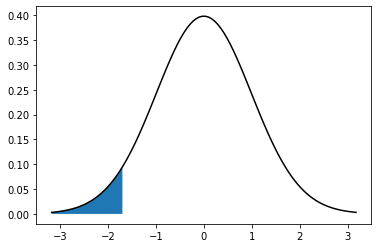

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

n = 100
df = n-1
x = np.linspace(t.ppf(0.001, df), t.ppf(0.999, df), n)
p = t.pdf(x, df)

plt.plot(x, p, 'k')
plt.fill_between(x, 0, p, interpolate=True,
                 where=(x <= t.ppf(0.05, df)))

**Two-tailed test**: Form hypothesis H1: *The mean maximum grain size is **different** in the two samples*. There are two possible ways it can be different - higher than *or* lower than. Two-tailed test has two *significance regions* - one in each tail - each half size of one-tailed significance region.

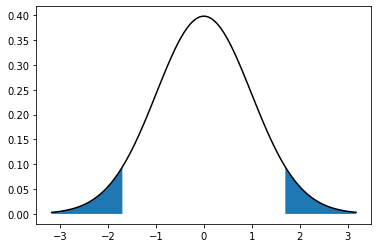

In [54]:
plt.plot(x, p, 'k')
plt.fill_between(x, 0, p, interpolate=True,
                 where=((x <= t.ppf(0.05, df)) | (x >= t.ppf(0.95, df))))

### Tails in practice

1. Decide if your test is one or two-tailed BEFORE doing it!
2. Values returned by [scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html) functions (e.g. [ttest_ind](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind)) are for two-tailed tests
  1. If your test is two-tailed, there is no issue
  2. If test is one-tailed, halve the p-value before interpreting it.
  
What is the t-statistic and the p-value for our data?

In [49]:
grain_A = [3, 6.8, 6.5, 4.8, 4.4, 3.7, 5, 3.4, 4.6, 3.7, 3.9, 5.4, 6.5, 4.1, 4.5, 6.8, 5.9, 3.3, 4.5, 3.2, 6.9, 
           6.8, 6.1, 5.3, 4.3, 3.4, 6.6, 3.1, 5.5]

grain_B = [5.1, 6.4, 6.2, 3.2, 5.8, 5.7, 4.1, 5.9, 5.2, 3.7, 6.8, 4.7, 4.2, 6.2, 4.3, 6.4, 6.6, 3.7, 6.4, 4.1, 
           3.6, 6.6, 4.8, 6.2, 4.7, 6.2]

from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(grain_A, grain_B)
print ("t-statistic = ", t_statistic)
print ("p-value = ", p_value)

t-statistic =  -1.0987785479097678
p-value =  0.2768311021423313


In the above grain size example the t-statistic and p-values are -1.1 and 0.28 respectively. **Is a probability of 0.28 enough to reject H0?**

>**NOTE**: In the example above the p-value was 0.28, but this is a two-tailed value while the test was one-tailed. The actual value for the test was 0.14. In this case it is still not significant (>0.05) but halving could easily make all the difference!

The p-value is used to determine the likelihood of the null hypothesis were true - it is the probability of observing a more extreme test statistic in the direction of the alternative hypothesis. If the p-value is very small, then it the null hypothesis is *unlikely*. If the p-value is larger than some preset threshold, then it is considered *likely*.

The steps involved in using the p-value approach to conducting any hypothesis test are:

- Specify the null and alternative hypotheses and choose the appropriate test.
- Decide the significance level for the p-value,  𝛼 .
- Calculate the value of the test statistic and the p-value.
- Consider, if the null hypothesis is true, what is the probability that we'd observe a more extreme test statistic in the direction of the alternative hypothesis than we did? Note how this question is equivalent to the question answered in criminal trials: "If the defendant is innocent, what is the chance that we'd observe such extreme criminal evidence?"
- If the p-value is less than (or equal to)  𝛼 , reject the null hypothesis in favor of the alternative hypothesis. Otherwise, accept the null hypothesis

## Test Results
In the grain size example above the p-value is 0.28, which is *far above the 0.05 significant level*. Therefore, the result said to be not significant - not enough evidence to reject H0. As good statisticians, we say that the two samples probably have the same origin.

# Experiment 2: Placebo testing

We use a fictitious example from [Kruschke (2012)](http://www.indiana.edu/~kruschke/articles/KruschkeAJ2012.pdf) concerning the evaluation of a clinical trial for drug evaluation. 

The trial aims to evaluate the efficacy of a "smart drug" that is supposed to increase intelligence by comparing IQ scores of individuals in a treatment arm (those receiving the drug) to those in a control arm (those recieving a placebo). There are 47 individuals and 42 individuals in the treatment (`drug`) and control (`placebo`) arms, respectively, and these are their post-trial IQs. An IQ between 90 and 110 is considered average; over 120, superior. Let's look at the histograms of our data, ***first thing you should always do***.

Note that although our IQ data is integer type, our datasets here could easily be real-valued, and so we consider our random variable to be **continuous**.

Please plot histograms using `pd.concat([drug, placebo], ignore_index=True)`, and then `.hist('iq', by='group')` on the pandas dataframe.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000268FD134BC8>,
      dtype=object)

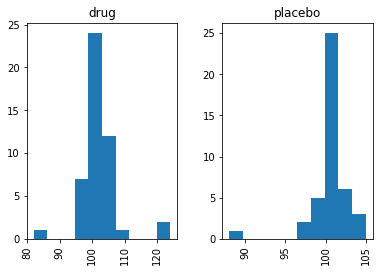

In [50]:
drug = pd.DataFrame(dict(iq=(101,100,102,104,102,97,105,105,98,101,100,123,105,103,100,95,102,106,
        109,102,82,102,100,102,102,101,102,102,103,103,97,97,103,101,97,104,
        96,103,124,101,101,100,101,101,104,100,101),
                         group='drug'))
placebo = pd.DataFrame(dict(iq=(99,101,100,101,102,100,97,101,104,101,102,102,100,105,88,101,100,
           104,100,100,100,101,102,103,97,101,101,100,101,99,101,100,100,
           101,100,99,101,100,102,99,100,99),
                            group='placebo'))

trial_data = pd.concat([drug, placebo], ignore_index=True)
trial_data.hist('iq', by='group')

## Theory

A [confidence interval](https://en.wikipedia.org/wiki/Confidence_interval) is a **range** of sample values above and below a point estimate of a parameter (like the `mean`) that captures the true population parameter at some predetermined **confidence level**. 

For example, if you want to have a 95% chance of capturing the *true* population mean, you'd set your confidence level to 95%. Confidence levels are related to the size of your sampling, and the standard deviation of the *true* population.

Sometimes we also say the *confidence level is 95%*.

The [significance level](https://en.wikipedia.org/wiki/Statistical_significance) (denoted by $\alpha$) is 1 - the confidence interval bound. So, a significance level of 0.05 corresponds to a confidence level of 95%. 

You calculate a confidence interval by taking a point estimate of some parameter (e.g. the mean) from a sample with size $n$, for example using MOM or MLE methods, and then adding and subtracting a [margin of error](https://en.wikipedia.org/wiki/Margin_of_error) to create a **range**. **Margin of error** is based on your desired confidence level, the spread of the population, and the size of your sample. 

This comes from the ***desire to obtain some kind of probability estimate on point estimates of model parameters***.

The way you calculate the margin of error depends on whether you know the spread of the population or not. If you know the standard deviation $\sigma$ of the population (a measure of spread), the margin of error is equal to:

$$ z ∗ \frac{\sigma}{\sqrt{n}}$$

Where $z$ is a number known as the [z-critical value](https://en.wikipedia.org/wiki/Z-test). The **z-critical value** is the *number* of standard deviations you'd have to go from the mean of the distribution to capture the proportion of the data associated with the desired confidence level. 

For instance, we know that roughly 95% of the data in a *normal* (gaussian) distribution lies within 2 standard deviations of the mean, so we use 2 as the `z-critical value` for a 95% confidence interval. For all other distributions, you use the quantile function `stats.t.ppf` to compute $z$.

## Practice

[scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_ind.html) is
a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that ***the populations have identical variances***.

The **T-test** measures whether the average (expected) value differs significantly across samples. If we observe a **large** p-value, for example larger than 0.1, then we cannot reject the null hypothesis of identical average scores, we have to say *there is nothing strange going on*. If the p-value is **smaller than the threshold**, then we reject the null hypothesis of equal averages (*there is something interesting going on*).

Note that this test works on averages (expected) values, and that a **point estimate** does *not* capture the richness of all available statistics. In fact, it often returns bad results, *such as for this drug/placebo dataset*!

Let's do the estimation for our dataset.

In [55]:
combined_iq = np.concatenate((drug.iq, placebo.iq))
print(len(drug.iq))
print(len(placebo.iq))
print( drug.iq.mean() )
print( placebo.iq.mean() )
print( combined_iq.mean() )

# we run the t-test without supposing the variance is the same (more general)
ttest_ind(a= drug.iq,
          b= placebo.iq,
          equal_var=False) 

47
42
101.91489361702128
100.35714285714286
101.17977528089888


Ttest_indResult(statistic=1.622190457290228, pvalue=0.10975381983712831)

The test yields a p-value of 0.10975, which means ***there is a 11% chance we'd see sample data this far apart statistically if the two groups tested are actually identical***. 

If we were using a 95% confidence level, we would **fail** to reject the null hypothesis, since the p-value is greater than the corresponding significance level of 0.05. And so we conclude that the drug is as effective as placebo at a 95% confidence level: there is nothing interesting going on. At a significance level of 0.05, drug outcome on IQ is statistically **nonsignificant**.

For *another* perspective, the test result shows the test statistic is equal to 1.622. This test statistic tells us how much the sampled mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we need to reject the null hypothesis. We get the quantiles of the [Student-T](https://en.wikipedia.org/wiki/Student%27s_t-distribution) distribution using `stats.t.ppf`.

In [56]:
t.ppf(q=0.05,  # Quantile to check
            df=42)  # Degrees of freedom

-1.6819523559426006

Here we see that our test statistic of 1.62 is ***within the quantile of the t-distribution (1.68)***, so we should accept the null hypothesis.

# Experiment 3: Testing for Normality 

Recall that normality is prettiness. `Scipy` has a test for prettiness! Rather than guessing whether a distribution is normal, can we test for it!

* $H_0$ : 'Underlying distribution is normal.'
* $H_1$ : 'Underlying distribution is not normal.'

Actully, many different tests of normality (prettiness) exist - no universal agreement on which is best. 

A good solution is *D’Agostino & Pearson combined test*, provided by Python via the method [scipy.stats.normaltest](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html). This function tests the null hypothesis that a sample comes from a normal distribution.

In [82]:
# Read in the records.
record = np.recfromcsv("data/years.csv") 

print (record.dtype.names)
from scipy.stats import normaltest

('field_mark', 'overall_year')


Skew =  11.90871817961577
H0 - field marks come from a normal distribution: 
0.002594506147282213
Reject in favor of H1.


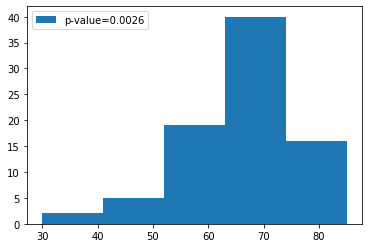

In [83]:
field_mark = np.array(record["field_mark"], dtype=float)
k2, p = normaltest(field_mark)
print ("Skew = ", k2)
print ("H0 - field marks come from a normal distribution: ")
print (p)
if p<0.05:
    print ("Reject in favor of H1.")
else:
    print ("Accept.")

plt.hist(field_mark, bins=5)
plt.legend(("p-value=%.2g"%p, ))

Skew =  0.0402331177377869
H0 - overall year marks come from a normal distribution: 
0.98008442911632
Accept.


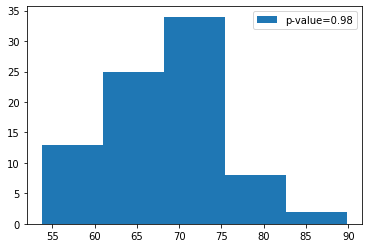

In [84]:
overall_year = np.array(record["overall_year"], dtype=float)

k2, p = normaltest(overall_year)
print ("Skew = ", k2)
print ("H0 - overall year marks come from a normal distribution: ")
print (p)
if p<0.05:
    print ("Reject in favor of H1.")
else:
    print ("Accept.")

plt.hist(overall_year, bins=5)
plt.legend(("p-value=%.2g"%p, ))

# Non-parametric statistical tests

The most commonly used non-parametric test is the [Mann-Whitney U test](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu).

* Uses ranks of data (like Spearman’s correlation).
* Does not require distributions of data to be normal.
* Less powerful test (more false negatives) if distributions are normal (as all non-parametric tests).

When a mathematical model is available the [Kolmorogov-Smirnov (K-S) test](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest) is commonly used.

* K-S test is for *goodness of fit* – how well a distribution fits a mathematic model.
* *Two-sample* K-S test variant can be used as a non-parametric alternative to a t-test.
* Tests more than just difference in means - tests other aspects of distribution shape.
* Use to answer questions like *do these two samples seem to come from the same underlying population*?

The K-S test is *stricter* with the data than the t-test, as we can see below:

In [209]:
drug.iq.values

array([101, 100, 102, 104, 102,  97, 105, 105,  98, 101, 100, 123, 105,
       103, 100,  95, 102, 106, 109, 102,  82, 102, 100, 102, 102, 101,
       102, 102, 103, 103,  97,  97, 103, 101,  97, 104,  96, 103, 124,
       101, 101, 100, 101, 101, 104, 100, 101], dtype=int64)

In [210]:
# K-S test whether they come from the same distribution
from scipy.stats import ks_2samp
d,p = ks_2samp(drug.iq.values, placebo.iq.values)

print('The p-value for comparison is', p)
print('H0-two sample come from the same distribution:')
if p <= 0.05:
    print('reject, they are not from the same distribution')
else:
    print('accept')

The p-value for comparison is 0.03098350741230682
H0-two sample come from the same distribution:
reject, they are not from the same distribution


In [211]:
drug.iq.values

array([101, 100, 102, 104, 102,  97, 105, 105,  98, 101, 100, 123, 105,
       103, 100,  95, 102, 106, 109, 102,  82, 102, 100, 102, 102, 101,
       102, 102, 103, 103,  97,  97, 103, 101,  97, 104,  96, 103, 124,
       101, 101, 100, 101, 101, 104, 100, 101], dtype=int64)

But hey... it was a ***close call***!

We can even compare against known theoretical distributions:

The p-value for the drug group is 8.783862526229314e-12
Is the drug group fit for the exponential distribution?
reject


C:\Users\liaoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


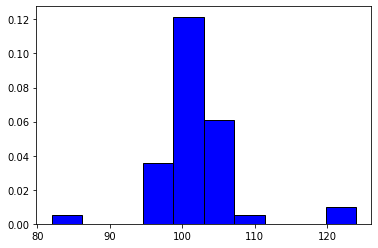

In [212]:
from scipy.stats import expon

#test exponential distribution for trilo1
n, x, temp = plt.hist(drug.iq.values, color='blue', edgecolor='k', normed=True)
d1,p1 = scipy.stats.ks_2samp(drug.iq.values, expon.pdf(x))
print('The p-value for the drug group is', p1)
print('Is the drug group fit for the exponential distribution?')
if p1<=0.05:
    print('reject')
else:
    print('accept')

The p-value for the drug group is 8.783862526229314e-12
Is the drug group fit for the normal distribution?
reject


C:\Users\liaoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


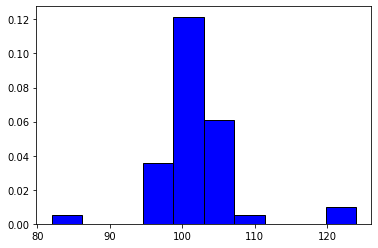

In [213]:
from scipy.stats import norm

#test exponential distribution for trilo1
n, x, temp = plt.hist(drug.iq.values, color='blue', edgecolor='k', normed=True)
d1,p1 = scipy.stats.ks_2samp(drug.iq.values, norm.pdf(x))
print('The p-value for the drug group is', p1)
print('Is the drug group fit for the normal distribution?')
if p1<=0.05:
    print('reject')
else:
    print('accept')

C:\Users\liaoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


TypeError: _parse_args() missing 1 required positional argument: 'mu'

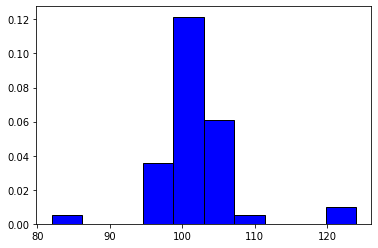

In [214]:
from scipy.stats import poisson

#test exponential distribution for trilo1
n, x, temp = plt.hist(drug.iq.values, color='blue', edgecolor='k', normed=True)
d1,p1 = scipy.stats.ks_2samp(drug.iq.values, poisson.ppf(x))
print('The p-value for the drug group is', p1)
print('Is the drug group fit for the poisson distribution?')
if p1<=0.05:
    print('reject')
else:
    print('accept')

Because the poisson looks *so different* depending on its **Expectation**, we *need* to pass in its parameter. Let's pass in the first empirical moment!

The p-value for the drug group is 8.783862526229314e-12
Is the drug group fit for the poisson distribution?
reject


C:\Users\liaoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


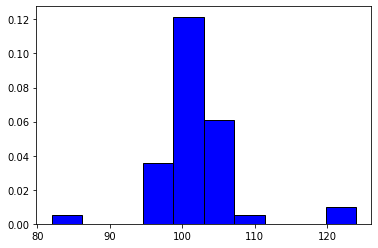

In [65]:
from scipy.stats import poisson

#test exponential distribution for trilo1
n, x, temp = plt.hist(drug.iq.values, color='blue', edgecolor='k', normed=True)
d1,p1 = scipy.stats.ks_2samp(drug.iq.values, poisson.ppf(x, mu = drug.iq.values.mean()))
print('The p-value for the drug group is', p1)
print('Is the drug group fit for the poisson distribution?')
if p1<=0.05:
    print('reject')
else:
    print('accept')

*total disaster*...

# Conclusion

That's **classical hypothesis testing**!. All the classical frequentist tests statistics that we saw examples of above are just ways to compute p-values *efficiently*. When computation was expensive, these shortcuts were very valuable!

Now that computation is fast and we can count very efficiently on our laptops, there are algorithms that we'll study next week (e.g. Metropolis and NUTS) that count very efficiently, too, and Bayesian estimation, as you will see, is a very sexy new way to do statistics!

# Homework Part I

1. I have a drug group and a placebo group. I want some quantitative confirmation to see if they produce the ***same*** or ***different*** outcomes: `drug-A` and `placebo-A`.

2. I have a drug group and a placebo group: `drug-B` and `placebo-B`. The mean outcome is ***lower*** in the placebo group and I have a theory that may explain this, but I first need to rule out the possibility that the lower outcome is just due to chance.

In each case construct (i.e. actually write down) your two hypotheses, decide from how they are worded, whether they are one-tailed or two-tailed, then use statistical tests to assess which you should accept.

Hints:

* Test data sets for normality (are they pretty, do they have a normal distribution?). Use the test we have not used yet, the D’Agostino & Pearson test to provide probabilities of normality (prettiness).

* Test whether means differ significantly: When testing if means are different, you should use use either a two-tailed Mann-Whitney p-value, or a two-tailed T-test p-value, depending on the result of the normality test. Remember that `scipy.stats`'s `Mann-Whitney` function returns a one-tailed p-value.

## Question1: I have a drug group and a placebo group. I want some quantitative confirmation to see if they produce the same or different outcomes: drug-A and placebo-A.

In [245]:
drugA = np.recfromcsv("data/drug-A.csv") 
placeboA = np.recfromcsv("data/placebo-A.csv")
drug_A = np.array(drugA,dtype=float)
placebo_A = np.array(placeboA,dtype=float)
print(placebo_A)

[1.16 1.2  1.11 1.15 1.37 0.95 1.37 1.32 0.97 1.45 0.98 0.96 0.92 1.09
 1.72 1.26 1.1  1.08 1.34 0.87 1.05 0.97 1.45 1.06 1.21 0.99 1.2  1.43
 1.08 1.19 1.06 0.86 0.61 1.   0.84 1.47 0.91 1.13 1.03 1.18 1.03 1.04
 1.13 1.26 1.66 1.05 1.09 1.25 0.67 1.33 1.49 0.89 1.13 1.2  1.06 0.85
 1.07 1.28 1.14 1.18 1.12 1.23 0.98 0.78 1.26 1.4  0.86 1.29 0.91 0.99
 1.65 1.55 1.15 1.28 1.26 1.53 1.36 0.94 1.12 1.16 1.35 1.05 1.45 0.99
 1.05 1.4  0.91 1.31 1.5  1.64 1.14 1.05 1.29 1.22 1.13 1.23 1.2  0.7
 0.91 0.56 1.06 1.15 1.39 1.16 1.03 0.95 0.99 1.18 0.98 1.32 1.01 1.02
 1.26 1.05 1.34 1.3  0.95 0.94 0.98 0.95 1.24 1.1  1.07 1.36 1.52 0.82]


In [246]:
type(drug_A)

numpy.ndarray

𝐻0  : 'DrugA group  distribution is normal.'

𝐻1  : 'DrugA group  distribution is not normal.'

Skew =  1.287411721043734
H0 - DrugA come from a normal distribution: 
0.5253419681562425
Accept.


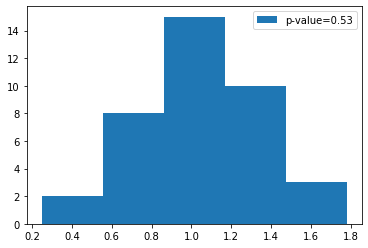

In [247]:

k2, p = normaltest(drug_A)
print ("Skew = ", k2)
print ("H0 - DrugA come from a normal distribution: ")
print (p)
if p<0.05:
    print ("Reject in favor of H1.")
else:
    print ("Accept.")

plt.hist(drug_A, bins=5)
plt.legend(("p-value=%.2g"%p, ))

𝐻0 : 'placeboA group distribution is normal.'

𝐻1 : 'placeboA group distribution is not normal.'

Skew =  1.2202628948918977
H0 - PlaceboA come from a normal distribution: 
0.5432794516844254
Accept.


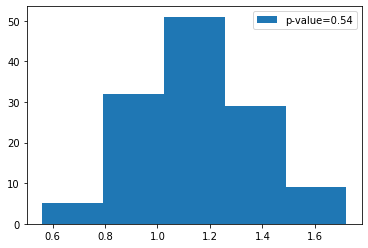

In [248]:

k2, p = normaltest(placebo_A)
print ("Skew = ", k2)
print ("H0 - PlaceboA come from a normal distribution: ")
print (p)
if p<0.05:
    print ("Reject in favor of H1.")
else:
    print ("Accept.")

plt.hist(placebo_A, bins=5)
plt.legend(("p-value=%.2g"%p, ))

So drugA and PlaceboA come from a normal distribution. So we choose to use T-test

H0: drugA and placeboA comes from the same distribution

H1: drugA and placeboA comes from different distribution

In [249]:
drug_A

array([0.82, 1.57, 1.11, 0.84, 1.05, 1.05, 1.04, 1.19, 1.26, 1.28, 0.91,
       0.98, 1.08, 1.55, 0.96, 1.28, 0.95, 0.95, 0.75, 1.78, 1.46, 0.87,
       0.25, 1.4 , 0.86, 0.84, 0.99, 1.25, 0.71, 0.72, 1.2 , 1.12, 0.65,
       1.08, 1.24, 1.34, 0.43, 1.05])

In [251]:
from scipy.stats import ks_2samp
d,p = ks_2samp(drug_A,placebo_A)

print('The p-value for comparison is', p)
print('H0-two sample come from the same distribution:')
if p <= 0.05:
    print('reject, they are not from the same distribution')
else:
    print('accept')

The p-value for comparison is 0.14937368340991186
H0-two sample come from the same distribution:
accept


As we can see p-value>0.05, so we can not reject H0.Which means two sample have the same means. So drugA and placeboA comes from same distribution.

## Question2: I have a drug group and a placebo group: drug-B and placebo-B. The mean outcome is lower in the placebo group and I have a theory that may explain this, but I first need to rule out the possibility that the lower outcome is just due to chance.

In [252]:
drugB = np.recfromcsv("data/drug-B.csv") 
placeboB = np.recfromcsv("data/placebo-B.csv")
drug_B = np.array(drugB,dtype=float)
placebo_B = np.array(placeboB,dtype=float)
print(placebo_B)

[6.2 4.8 5.8 4.7 5.6 5.3 4.3 3.9 4.7 2.5 5.4 6.1 4.8 4.8 6.4 5.2 4.7 3.5
 5.4 5.  5.3 4.8 6.  6.2 5.1 5.1 6.5 4.4 6.4 4.2 3.5 5.3 5.6 4.4 4.8 6.3
 3.9 3. ]


𝐻0 : 'DrugB group distribution is normal.'

𝐻1 : 'DrugB group distribution is not normal.'

Skew =  20.701784062790804
H0 - DrugB come from a normal distribution: 
3.19642639296486e-05
Reject in favor of H1.


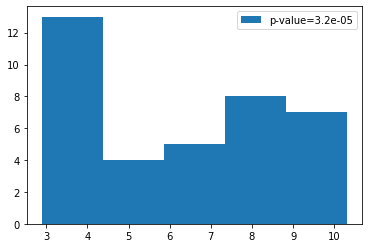

In [253]:

k2, p = normaltest(drug_B)
print ("Skew = ", k2)
print ("H0 - DrugB come from a normal distribution: ")
print (p)
if p<0.05:
    print ("Reject in favor of H1.")
else:
    print ("Accept.")

plt.hist(drug_B, bins=5)
plt.legend(("p-value=%.2g"%p, ))

𝐻0 : 'placeboB group distribution is normal.'

𝐻1 : 'placeboB group distribution is not normal.'

Skew =  2.0203883984723765
H0 - PlaceboB come from a normal distribution: 
0.36414825539139845
Accept.


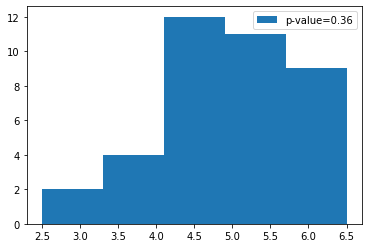

In [256]:

k2, p = normaltest(placebo_B)
print ("Skew = ", k2)
print ("H0 - PlaceboB come from a normal distribution: ")
print (p)
if p<0.05:
    print ("Reject in favor of H1.")
else:
    print ("Accept.")

plt.hist(placebo_B, bins=5)
plt.legend(("p-value=%.2g"%p, ))

So drugB do not comes from a normal distribution,so we have to use non-parametric statistical tests

H0:two samples have the same means

H1:two samples have different means

In [260]:
#In this question we use mannwhitneyu.
u_statistic, pVal = scipy.stats.mannwhitneyu(drug_B, placebo_B,alternative='two-sided')

print("t-statistic = ",u_statistic)
print("p-value = ",pVal)
print("halve p-value = ", p_value/2)

if (p_value/2)<0.05:
    print("Reject in favor of H1")
else:
    print("Accept H0.")

t-statistic =  893.5
p-value =  0.043966087030391815
halve p-value =  [0.01901838]
Reject in favor of H1


From the data above we can see drugB and placeboB have different means because p_value/2<0.05, and placeboB have the lower mean

# Homework Part II: Random variates from arbitrary distribution

`scipy.stats.rv_histogram` produces a pdf from a histogram.

In [99]:
import scipy.stats
import numpy as np
data = scipy.stats.norm.rvs(size=100000, loc=0, scale=1.5, random_state=123)
hist = np.histogram(data, bins=100)
hist_dist = scipy.stats.rv_histogram(hist)
data[0]

-1.6284459049508417

In [85]:
len(data)

100000

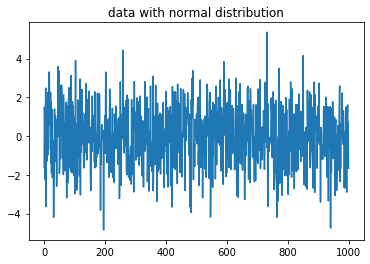

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("data with normal distribution")
plt.plot(data[0:1000], label='data')
#plt.show()

`hist_dist` behaves like an ordinary scipy rv_continuous distribution

In [87]:
hist_dist.pdf(1.0)

0.20538577847618705

In [88]:
hist_dist.cdf(2.0)

0.908185685430565

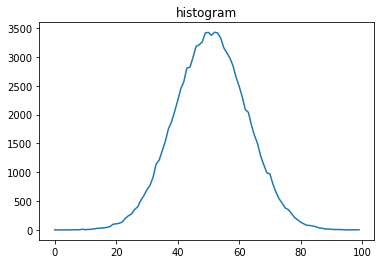

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("histogram")
plt.plot(hist[0], label='histogram')
plt.show()

PDF is zero above (below) the highest (lowest) bin of the histogram, defined by the max (min) of the original dataset

In [90]:
print(hist_dist.pdf(np.max(data)))
print(hist_dist.cdf(np.max(data)))
print(hist_dist.pdf(np.min(data)))
print(hist_dist.cdf(np.min(data)))

0.0
1.0
7.759190724449831e-05
0.0


PDF and CDF follow the histogram

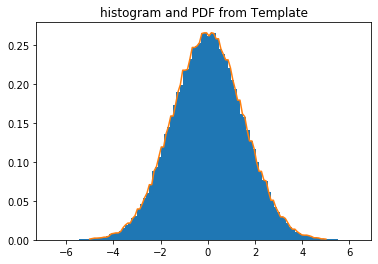

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
X = np.linspace(-5.0, 5.0, 100)
plt.title("histogram and PDF from Template")
plt.hist(data, density=True, bins=100)
plt.plot(X, hist_dist.pdf(X), label='PDF')
plt.show()

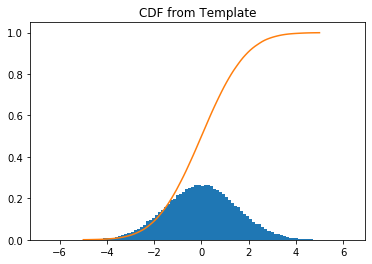

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline
X = np.linspace(-5.0, 5.0, 100)
plt.title("CDF from Template")
plt.hist(data, density=True, bins=100)
plt.plot(X, hist_dist.cdf(X), label='CDF')
plt.show()

In class, we've introduced all the theoretical distributions like `Normal`, `Poisson`, `Gamma`, and `Student-T` in order to generate realistic looking data that is: *pretty* (Normal), *reproduces counts of something* (Poisson), *quantities of something* (Gamma), and *financial data* (Student-T). But, can you actually write a python class that generates random variates, *given any desired histogram* that I give you (i.e. not necessarily an analytic pdf)? I challenge you...

In other words, if you look at last class' City of Tenessee precipitation data, can you actually generate fake data that looks exactly like the real precipitation profile for a specific month, without actually modelling the histogram with an analytic pdf like the Gamma? [GAN](https://en.wikipedia.org/wiki/Generative_adversarial_network)s are [used today](https://qz.com/1230470/the-hottest-trend-in-ai-is-perfect-for-creating-fake-media/) to generate very convicing pictures of people that actually do not exist (see below) and [fake news](https://www.theguardian.com/technology/2018/nov/12/deep-fakes-fake-news-truth) that never happened.

So, why not do the same with 1D data? The histogram is the *soul* of a dataset. If i give you the soul, you should be able to create fake data with the same soul...

# Question part2:
    

Create a class to generate fake data

In [131]:
import pandas as pd
import scipy.stats as stats


class GenDataLoader():
    #make sure there are three input Origin array,data number,the range of data
    def __init__(self, A, N, Min, Max):
        self.array = A
        self.number = N
        self.max = Max
        self.min = Min
        
    def start(self):
        # create a histogram use origin array
        hist = np.histogram(self.array, bins=100)
        hist_dist = scipy.stats.rv_histogram(hist)
        # create random data2 base on range
        data2 = np.random.uniform(self.min, self.max, self.number)
        
        data3 = hist_dist.ppf(data2)
        plt.title("Fake histogram")
        plt.hist(data3, density=True, bins=100)
        plt.plot(X, hist_dist.pdf(X), label='PDF')
        
        
       

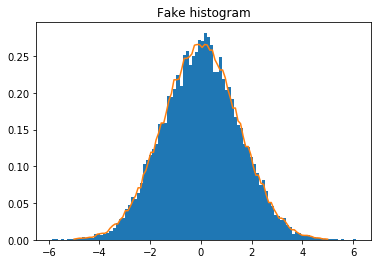

In [132]:
g= GenDataLoader(data,100000,0,5)
g.start()

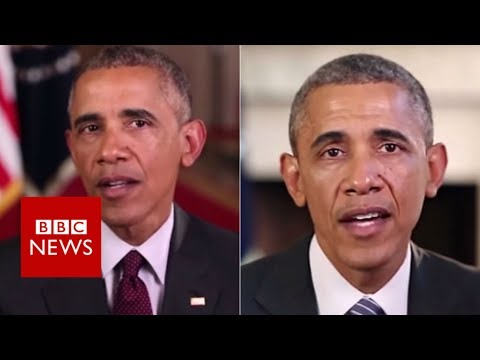

In [33]:
from IPython.display import YouTubeVideo
YouTubeVideo('AmUC4m6w1wo')

Please watch the [Oscars](https://oscar.go.com/) this Sunday.

</br >
<center>
<img src="ipynb.images/oscars.png" width=400 />
</center>

Next class next week, we'll hold the first INFO 6105 Oscars to give proces to the best comic books you wrote. *You* will vote for the winners! Please come *well dressed*. I will be well-dressed too (not like today)!!